

## 一、高管数据集



<br>


### 1.1 介绍
[数据集 | 90w条中国上市公司高管数据](https://textdata.cn/blog/2022-11-25-senior-manager-resume-dataset/)

90w 条中国上市公司高管简历，数据源-新浪财经，统计的日期范围**1990-2021**年。
    
    
### 1.2 字段
数据集的字段含，大多是从「个人简历」中计算衍生出来的。

```
- ID
- 姓名
- 证券代码
- 统计截止日期
- 个人简历
- 国籍
- 籍贯
- 籍贯所在地区代码
- 出生地
- 出生地所在地区代码
- 性别
- 年龄
- 毕业院校
- 学历  1=中专及中专以下； 2=大专； 3=本科； 4=硕士研究生； 5=博士研究生； 6=其他（以其他形式公布的学历，如荣誉博士、函授等）； 7=MBA/EMBA
- 专业
- 职称
- 是否领取薪酬
- 报告期报酬总额
- 年末持股数
- 是否高管团队成员
- 是否董事会成员
- 是否独立董事
- 是否兼任董事长和CEO
- 是否监事
- 具体职务
```


<br>

### 1.3 应用价值

这里粘贴部分应用高管数据论文

- 何瑛,于文蕾,戴逸驰,王砚羽.高管职业经历与企业创新[J].管理世界,2019,35(11):174-192.
- 杨林,和欣,顾红芳.高管团队经验、动态能力与企业战略突变：管理自主权的调节效应[J].管理世界,2020,36(06):168-188+201+252.
- 周楷唐,麻志明,吴联生.高管学术经历与公司债务融资成本[J].经济研究,2017,52(07):169-183.
- 陆瑶,张叶青,黎波,赵浩宇.高管个人特征与公司业绩——基于机器学习的经验证据[J].管理科学学报,2020,23(02):120-140.
- 柳光强,孔高文.高管经管教育背景与企业内部薪酬差距[J].会计研究,2021,(03):110-121.
- 郑建明,孙诗璐,李金甜.高管文化背景与企业债务成本——基于劳模文化的视角[J].会计研究,2021,(03):137-145.
    
    
<br>

## 二、代码案例

用Python实现以下五个技术难题，主要对高管简介进行操作

1. 读取xlsx文件（90w高管数据）
2. 简介文本中是否含指定词语(例如找出有【清华大学】求学经历的高管)
3. 大学高管数量排行榜
4. 统计文本中指定词语出现次数(例如统计每位高管内【大学】出现次数)
5. 找出每位高管的出生年份(用正则表达式)
6. 统计每位高管经历的时间点个数
...

### 2.1 导入数据


In [1]:
import pandas as pd

df = pd.read_excel('高管数据.xlsx')
#剔除「个人简历」字段中的缺失值
df.dropna(subset=['个人简历'], inplace=True)
df.head()

,ID,姓名,证券代码,统计截止日期,个人简历,国籍,籍贯,籍贯所在地区代码,出生地,出生地所在地区代码,...,是否领取薪酬,报告期报酬总额,津贴,年末持股数,是否高管团队成员,是否董事会成员,是否独立董事,是否兼任董事长和CEO,是否监事,具体职务
0,30276026,赵勇,605169,2020-10-30,赵勇先生，副总经理，中国国籍，无境外永久居留权，1969年6月出生，大专学历；曾任新疆生产建...,中华人民共和国,北京市,110000,北京市,110000,...,Y,269600.0,NaN,NaN,1,0,0,0,0,副总经理
1,3056116,林菁,689009,2020-10-29,林菁先生，1965年3月出生，中国国籍，无境外永久居留权，对外经济贸易大学工商管理（MBA）...,中华人民共和国,北京市,110000,北京市,110000,...,N,166300.0,166300.0,NaN,0,1,1,0,0,独立董事
2,30568910,信意安,2995,2020-08-05,"信意安,男,1972年出生,中国国籍,无境外永久居留权,专科学历,现任发行人董事长兼总经理,...",中华人民共和国,北京市,110000,北京市,110000,...,Y,950000.0,NaN,22509250.0,1,1,0,1,0,"董事长,非独立董事,总经理"
3,30101636,赵炳弟,688561,2020-07-22,赵炳弟先生，独立董事，生于1960年10月，中国籍，无境外永久居留权，研究生学历，毕业于中央...,NaN,北京市,110000,北京市,110000,...,N,105000.0,105000.0,NaN,0,1,1,0,0,独立董事
4,30138872,张金,688377,2020-07-08,张金先生：中国国籍，1962年出生，无境外永久居留权，本科学历，高级工程师，2009年2月被...,中华人民共和国,北京市,110000,北京市,110000,...,N,60000.0,60000.0,NaN,0,1,1,0,0,独立董事


<br>

### 2.2 简介文本长度

In [91]:
df['个人简历'].str.len()

#新增一个字段length，将简介文本长度保存到length中
#df['length'] = df['个人简历'].str.len()

0         161
1         154
2         395
3         306
4         335
         ... 
900882     40
900883     54
900884     71
900885     41
900886     62
Name: 个人简历, Length: 736970, dtype: int64

<br>

### 2.3 简介文本中是否含指定词语

例如找出有【清华大学】求学经历的高管,这里直接使用**Series.str.contains()**方法来直接搜某字段(Series)是否含某个词

- ``len(df[df['个人简历'].str.contains('清华大学')])`` 有「清华大学」学习经历的高管人数
- ``len(df[df['个人简历'].str.contains('北京大学')])`` 有「北京大学」学习经历的高管人数
- ``len(df[df['个人简历'].str.contains('清华大学|北京大学')])`` 有「清华大学」或「北京大学」学习经历的高管人数
- ``len(df[df['个人简历'].str.contains('清华大学') & df['个人简历'].str.contains('北京大学')])`` 同时有「清华大学」和「北京大学」学习经历的高管人数

第三个(北大清华)表达式的数量应该是最多的(前两者之和)， 第四个表达式是最少。 注意, 逻辑【或|】【且&】可以有任意多个

In [78]:
#统计有【清华大学】学习经历的高管人数
len(df[df['个人简历'].str.contains('清华大学')])

10377

In [77]:
len(df[df['个人简历'].str.contains('北京大学')])

8709

In [76]:
len(df[df['个人简历'].str.contains('清华大学|北京大学')])

18647

In [72]:
len(df[df['个人简历'].str.contains('清华大学') & df['个人简历'].str.contains('北京大学')])

439

<br>

### 2.4 大学高管数量排行榜

In [69]:
#测试列表(凭记忆手动输入的大学，各位可以自己设计测试列表)
test_universitys = ['清华大学', '北京大学', '中国人民大学', '浙江大学', 
                    '上海交通大学', '西安交通大学', '同济大学', '南开大学', '天津大学', 
                    '武汉大学', '华中科技大学', '中国科学技术大学', '南京大学',
                    '中山大学', '中南大学', '四川大学', '重庆大学', '兰州大学', '湖南大学', 
                    '山东大学', '吉林大学', '大连理工大大学', '东北大学', '北京航空航天大学', '中国地质大学']


print('大学高管人数排行')

uni_infos = []
for university in test_universitys:
    num = len(df[df['个人简历'].str.contains(university)])
    uni_infos.append((university, num))
    
uni_infos = sorted(uni_infos, key=lambda k:k[1], reverse=True)
uni_infos

大学高管人数排行


[('清华大学', 10377),
 ('北京大学', 8709),
 ('中国人民大学', 7012),
 ('浙江大学', 5816),
 ('中山大学', 4065),
 ('上海交通大学', 3844),
 ('武汉大学', 3578),
 ('南京大学', 3272),
 ('西安交通大学', 2972),
 ('南开大学', 2716),
 ('湖南大学', 2502),
 ('华中科技大学', 2356),
 ('同济大学', 2089),
 ('吉林大学', 2044),
 ('四川大学', 1934),
 ('山东大学', 1847),
 ('中南大学', 1615),
 ('天津大学', 1598),
 ('重庆大学', 1440),
 ('北京航空航天大学', 1334),
 ('东北大学', 1241),
 ('中国科学技术大学', 842),
 ('兰州大学', 745),
 ('中国地质大学', 437),
 ('大连理工大大学', 0)]

<br>

### 2.5 统计文本中指定词语出现次数
例如统计每位高管内【大学】出现次数

In [79]:
df['个人简历'].str.count('大学')

0         0
1         2
2         0
3         0
4         0
         ..
900882    0
900883    0
900884    0
900885    0
900886    0
Name: 个人简历, Length: 736970, dtype: int64

In [81]:
print('高管总人数: ', len(df))
#简历中无「大学」字眼
print('无大学经历高管人数:' , len(df[df['个人简历'].str.count('大学')==0]))
#简历中有「大学」字眼
print('有大学经历高管人数:' , len(df[df['个人简历'].str.count('大学')>0]))

高管总人数:  736970
无大学经历高管人数: 515172
有大学经历高管人数: 221798


<AxesSubplot:>

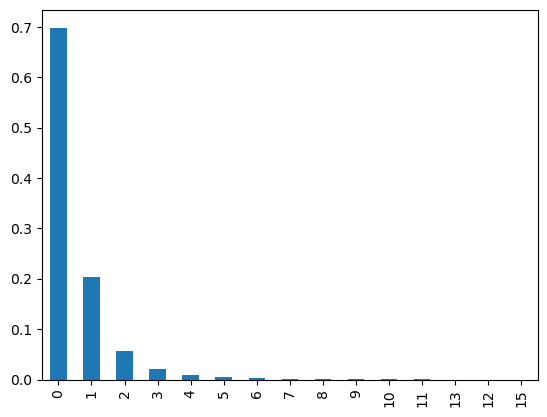

In [84]:
#有些企业单位名字中带有「大学」，但这类企业非常少。
#「大学」词语出现次数可以近似看做学习经历次数
#如此， 1可以看做本科学历，2看做研究生学历， 3看做博士学历
df['个人简历'].str.count('大学').value_counts(normalize=True).plot(kind='bar')

<br>

### 2.6 找出每位高管的出生年份(用正则表达式)

In [86]:
df['个人简历'].str.findall('\d{4}')

0                                                    [1969]
1                      [1965, 1984, 1986, 1990, 1994, 1995]
2         [1972, 1998, 1999, 2000, 2015, 2002, 2016, 200...
3         [1960, 1982, 1989, 1990, 1991, 1991, 2002, 200...
4         [1962, 2009, 1985, 1996, 1996, 2008, 1993, 200...
                                ...                        
900882                                                   []
900883                                                   []
900884                                                   []
900885                                                   []
900886                                                   []
Name: 个人简历, Length: 736970, dtype: object

In [93]:
def birth_year(years):
    try:
        #返回出生年份
        return years[0]
    except:
        #没有年份的，返回0
        return 0
    
    
#高管出生年份
df['个人简历'].str.findall('\d{4}').apply(birth_year)

0         1969
1         1965
2         1972
3         1960
4         1962
          ... 
900882       0
900883       0
900884       0
900885       0
900886       0
Name: 个人简历, Length: 736970, dtype: object

In [92]:
#高管时间点个数(感觉可以看做经历的个数)
df['个人简历'].str.findall('\d{4}').apply(lambda ys: len(set(ys)))

0          1
1          6
2         10
3         10
4          8
          ..
900882     0
900883     0
900884     0
900885     0
900886     0
Name: 个人简历, Length: 736970, dtype: int64